### Importación de datos



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [85]:
f1 = tienda.groupby('Producto')['Precio'].sum()-tienda.groupby('Producto')['Costo de envío'].sum()
f2 = tienda2.groupby('Producto')['Precio'].sum()-tienda2.groupby('Producto')['Costo de envío'].sum()
f3 = tienda3.groupby('Producto')['Precio'].sum()-tienda3.groupby('Producto')['Costo de envío'].sum()
f4 = tienda4.groupby('Producto')['Precio'].sum()-tienda4.groupby('Producto')['Costo de envío'].sum()
facturacion_p =pd.DataFrame({'Tienda 1':f1,'Tienda 2':f2,'Tienda 3':f3,'Tienda 4':f4})
facturacion_p['Total'] = facturacion_p.sum(axis=1)
facturacion_p

f1 = tienda.groupby('Categoría del Producto')['Precio'].sum()-tienda.groupby('Categoría del Producto')['Costo de envío'].sum()
f2 = tienda2.groupby('Categoría del Producto')['Precio'].sum()-tienda2.groupby('Categoría del Producto')['Costo de envío'].sum()
f3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()-tienda3.groupby('Categoría del Producto')['Costo de envío'].sum()
f4 = tienda4.groupby('Categoría del Producto')['Precio'].sum()-tienda4.groupby('Categoría del Producto')['Costo de envío'].sum()
facturacion_c =pd.DataFrame({'Tienda 1':f1,'Tienda 2':f2,'Tienda 3':f3,'Tienda 4':f4})
facturacion_c['Total'] = facturacion_c.sum(axis=1)
facturacion_c

,Tienda 1,Tienda 2,Tienda 3,Tienda 4,Total
Categoría del Producto,,,,,
Artículos para el hogar,12054600.0,13946100.0,14247600.0,14220400.0,5.446870e+07
Deportes y diversión,37168900.0,32867200.0,33670000.0,31580000.0,1.352861e+08
Electrodomésticos,344361200.0,330012200.0,311743700.0,268237700.0,1.254355e+09
Electrónicos,406529800.0,389016900.0,388919900.0,387647800.0,1.572114e+09
Instrumentos musicales,86415100.0,99432600.0,73272100.0,71148500.0,3.302683e+08
Juguetes,17016200.0,15057800.0,18359400.0,19149700.0,6.958310e+07
Libros,8317900.0,9535400.0,9002300.0,8780600.0,3.563620e+07
Muebles,177638800.0,166990200.0,190288000.0,182293600.0,7.172106e+08


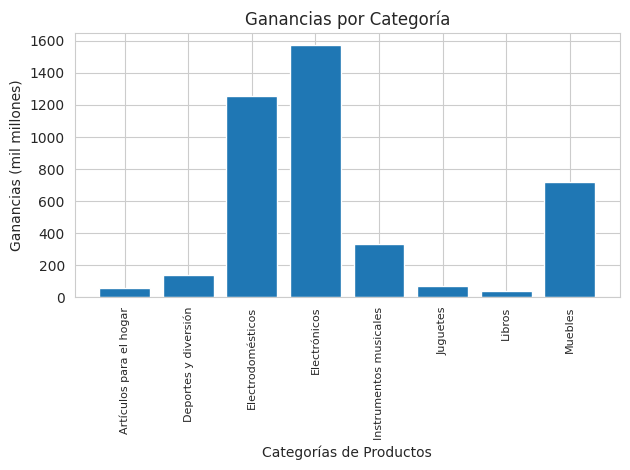

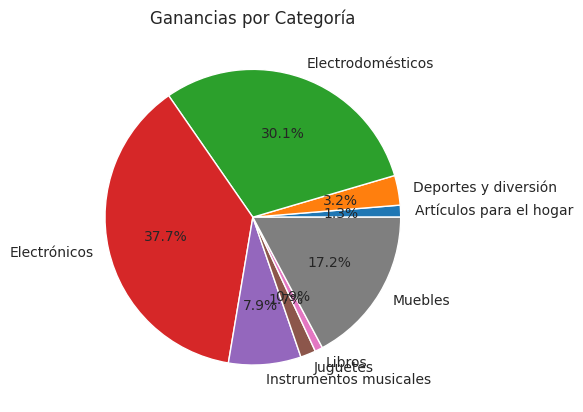

In [157]:
import matplotlib.pyplot as plt
plt.bar(facturacion_c.index, facturacion_c['Total']/1000000)
plt.title('Ganancias por Categoría')
plt.ylabel('Ganancias (mil millones)')
plt.xlabel('Categorías de Productos')
plt.xticks(rotation=90,fontsize=8)
plt.tight_layout()
plt.show()

plt.pie(facturacion_c['Total'], labels=facturacion_c.index, autopct='%1.1f%%')
plt.title('Ganancias por Categoría')
plt.show()

# 2. Ventas por categoría

In [100]:
v1=tienda.groupby('Categoría del Producto')['Precio'].sum()
v2=tienda2.groupby('Categoría del Producto')['Precio'].sum()
v3=tienda3.groupby('Categoría del Producto')['Precio'].sum()
v4=tienda4.groupby('Categoría del Producto')['Precio'].sum()
ventas = pd.DataFrame({'Tienda 1':v1,'Tienda 2':v2,'Tienda 3':v3,'Tienda 4':v4})
ventas['Total'] = ventas.sum(axis=1)
ventas

,Tienda 1,Tienda 2,Tienda 3,Tienda 4,Total
Categoría del Producto,,,,,
Artículos para el hogar,12698400.0,14746900.0,15060000.0,15074500.0,5.757980e+07
Deportes y diversión,39290000.0,34744500.0,35593100.0,33350100.0,1.429777e+08
Electrodomésticos,363685200.0,348567800.0,329237900.0,283260200.0,1.324751e+09
Electrónicos,429493500.0,410831100.0,410775800.0,409476100.0,1.660576e+09
Instrumentos musicales,91299000.0,104990300.0,77380900.0,75102400.0,3.487726e+08
Juguetes,17995700.0,15945400.0,19401100.0,20262200.0,7.360440e+07
Libros,8784900.0,10091200.0,9498700.0,9321300.0,3.769610e+07
Muebles,187633700.0,176426300.0,201072100.0,192528900.0,7.576610e+08


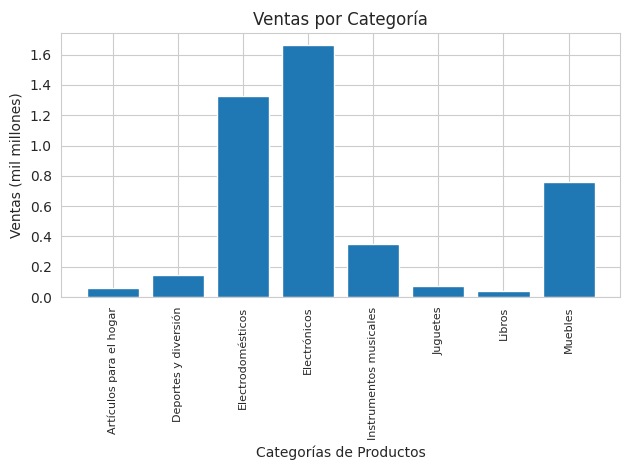

In [112]:
import matplotlib.pyplot as plt
plt.bar(ventas.index, ventas['Total']/1000000000)
plt.title('Ventas por Categoría')
plt.ylabel('Ventas (millones)')
plt.xlabel('Categorías')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [145]:
c1 = int(tienda['Calificación'].mean())
c2 = int(tienda2['Calificación'].mean())
c3 = int(tienda3['Calificación'].mean())
c4 = int(tienda4['Calificación'].mean())
print(f'La calificación promedio de la tienda 1 es de {c1}, de la tienda 2 es de {c2}, de la tienda 3 es de {c3} y de la tienda 4 es de {c4}')

La calificación promedio de la tienda 1 es de 3, de la tienda 2 es de 4, de la tienda 3 es de 4 y de la tienda 4 es de 3


# 4. Productos más y menos vendidos

In [63]:
q1=tienda.groupby('Producto')['Precio'].count()
q2=tienda2.groupby('Producto')['Precio'].count()
q3=tienda3.groupby('Producto')['Precio'].count()
q4=tienda4.groupby('Producto')['Precio'].count()
q_ventas = pd.DataFrame({'Tienda 1':q1,'Tienda 2':q2,'Tienda 3':q3,'Tienda 4':q4})
q_ventas

q1_max=q1.idxmax()
q1_min=q1.idxmin()
q2_max=q2.idxmax()
q2_min=q2.idxmin()
q3_max=q3.idxmax()
q3_min=q3.idxmin()
q4_max=q4.idxmax()
q4_min=q4.idxmin()

print(f'El producto más vendido en la tienda 1 es {q1_max} y el menos vendido es {q1_min}')
print(f'El producto más vendido en la tienda 2 es {q2_max} y el menos vendido es {q2_min}')
print(f'El producto más vendido en la tienda 3 es {q3_max} y el menos vendido es {q3_min}')
print(f'El producto más vendido en la tienda 4 es {q4_max} y el menos vendido es {q4_min}')

q_ventas['Total q'] = q_ventas.sum(axis=1)
q_vtas_max=q_ventas['Total q'].idxmax()
q_vtas_min=q_ventas['Total q'].idxmin()
print(f'El producto más vendido en todas las tiendas es {q_vtas_max} y el menos vendido es {q_vtas_min}')


El producto más vendido en la tienda 1 es Armario y el menos vendido es Auriculares con micrófono
El producto más vendido en la tienda 2 es Iniciando en programación y el menos vendido es Juego de mesa
El producto más vendido en la tienda 3 es Kit de bancas y el menos vendido es Bloques de construcción
El producto más vendido en la tienda 4 es Cama box y el menos vendido es Guitarra eléctrica
El producto más vendido en todas las tiendas es Mesa de noche y el menos vendido es Celular ABXY


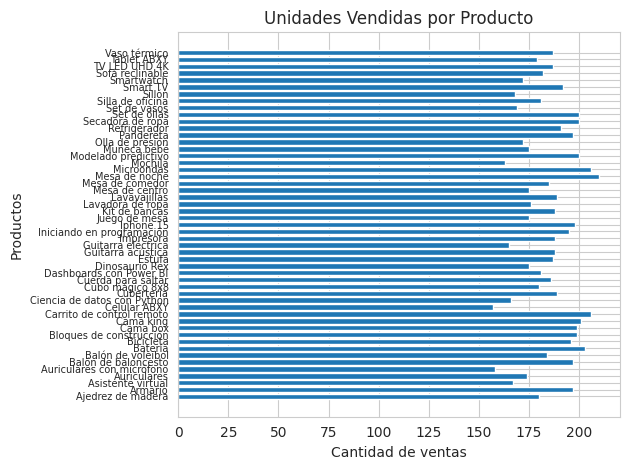

In [120]:
plt.barh(q_ventas.index, q_ventas['Total q'])
plt.title('Unidades Vendidas por Producto')
plt.xlabel('Cantidad de ventas')
plt.ylabel('Productos')
plt.yticks(fontsize=7)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [143]:
e1 = float(tienda['Costo de envío'].mean().round(2))
e2 = float(tienda2['Costo de envío'].mean().round(2))
e3 = float(tienda3['Costo de envío'].mean().round(2))
e4 = float(tienda4['Costo de envío'].mean().round(2))
print(f'El envío promedio de la tienda 1 es de ${e1}, el de la tienda 2 es de ${e2}, el de la tienda 3 es de ${e3} y el de la tienda 4 es de ${e4}')

El envío promedio de la tienda 1 es de $26018.61, el de la tienda 2 es de $25216.24, el de la tienda 3 es de $24805.68 y el de la tienda 4 es de $23459.46
